<a href="https://colab.research.google.com/github/missjaanii/Covid19Analysis/blob/master/covidanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta

In [2]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete.csv


In [255]:
df = pd.read_csv("covid_19_clean_complete.csv", parse_dates = ['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33125 entries, 0 to 33124
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  10000 non-null  object        
 1   Country/Region  33125 non-null  object        
 2   Lat             33125 non-null  float64       
 3   Long            33125 non-null  float64       
 4   Date            33125 non-null  datetime64[ns]
 5   Confirmed       33125 non-null  int64         
 6   Deaths          33125 non-null  int64         
 7   Recovered       33125 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.0+ MB


In [257]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,33125.000000,33125.000000,3.312500e+04,33125.000000,33125.000000
mean,21.181891,22.881195,5.530264e+03,366.236498,1728.502823
std,24.904248,70.245488,4.835556e+04,3315.406205,12244.962870
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000
25%,6.877000,-15.310100,0.000000e+00,0.000000,0.000000
50%,23.634500,21.005900,2.600000e+01,0.000000,1.000000
75%,41.153300,78.000000,5.260000e+02,7.000000,109.000000
max,71.706900,178.065000,1.662302e+06,98220.000000,379157.000000


In [258]:
df.describe(include='object')

,Province/State,Country/Region
count,10000,33125
unique,80,188
top,Reunion,China
freq,125,4125


In [259]:
a = df.Date.value_counts().sort_index()
print('The first date is:',a.index[0])
print('The last date is:',a.index[-1])

The first date is: 2020-01-22 00:00:00
The last date is: 2020-05-25 00:00:00


In [260]:
df.sum()

Country/Region    AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
Lat                                                          701650
Long                                                         757940
Confirmed                                                 183190009
Deaths                                                     12131584
Recovered                                                  57256656
dtype: object

In [0]:
df.rename(columns={'Date': 'date', 
                     'Province/State':'state',
                     'Country/Region':'country',
                     'Lat':'lat', 'Long':'long',
                     'Confirmed': 'confirmed',
                     'Deaths':'deaths',
                     'Recovered':'recovered'
                    }, inplace=True)


df['active'] = df['confirmed'] - df['deaths'] - df['recovered']

In [262]:
df1 = df
df1['date'] = pd.to_datetime(df1['date'])
df1['date'] = df1['date'].dt.strftime('%d/%m/%Y')
df1 = df1.fillna('-')
fig = px.density_mapbox(df1, lat='lat', lon='long', z='confirmed', radius=16,zoom=1, hover_data=["country","state","confirmed","deaths","recovered"],
                        mapbox_style="stamen-terrain", animation_frame = 'date', range_color= [0, 3000],title='Spread of Covid-19')
fig.update_layout(margin={"r":0,"t":16,"l":0,"b":0})
fig.show()

In [31]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_data.csv to covid_19_data.csv


In [263]:
covid=pd.read_csv("covid_19_data.csv")
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [264]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31992 entries, 0 to 31991
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              31992 non-null  int64  
 1   ObservationDate  31992 non-null  object 
 2   Province/State   16212 non-null  object 
 3   Country/Region   31992 non-null  object 
 4   Last Update      31992 non-null  object 
 5   Confirmed        31992 non-null  float64
 6   Deaths           31992 non-null  float64
 7   Recovered        31992 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.0+ MB


In [265]:
covid.shape

(31992, 8)

In [266]:
covid.sum()

SNo                                                        511760028
ObservationDate    01/22/202001/22/202001/22/202001/22/202001/22/...
Country/Region     Mainland ChinaMainland ChinaMainland ChinaMain...
Last Update        1/22/2020 17:001/22/2020 17:001/22/2020 17:001...
Confirmed                                                2.12611e+08
Deaths                                                   1.38064e+07
Recovered                                                7.10769e+07
dtype: object

In [267]:
covid.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     15780
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [268]:
covid.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [0]:
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

In [0]:
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()

In [271]:
print("Total number of countries with Disease Spread: ",len(covid["Country/Region"].unique()))

Total number of countries with Disease Spread:  223


In [272]:
print("Total number of Confirmed Cases around the World: ",datewise["Confirmed"].iloc[-1])

Total number of Confirmed Cases around the World:  6059017.0


In [273]:
print("Total number of Recovered Cases around the World: ",datewise["Recovered"].iloc[-1])

Total number of Recovered Cases around the World:  2564693.0


In [274]:
print("Total number of Deaths Cases around the World: ",datewise["Deaths"].iloc[-1])

Total number of Deaths Cases around the World:  369126.0


In [275]:
print("Total number of Active Cases around the World: ",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))

Total number of Active Cases around the World:  3125198.0


In [276]:
print("Total number of Closed Cases around the World: ",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])                                       #closed= death + recovered 

Total number of Closed Cases around the World:  2933819.0


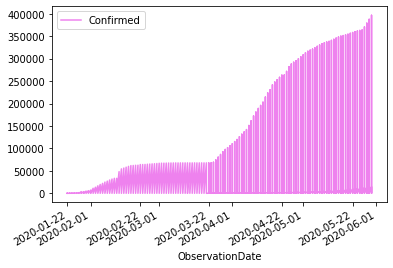

In [277]:
covid.plot(x='ObservationDate',y='Confirmed',color='violet')
plt.show()

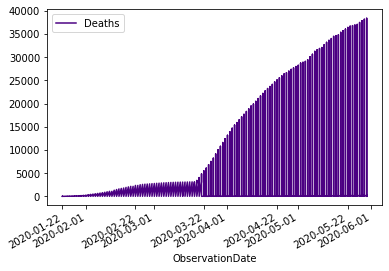

In [278]:
covid.plot(x='ObservationDate',y='Deaths',color='indigo')
plt.show()

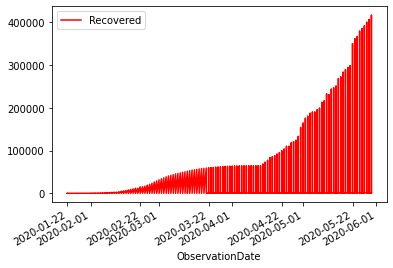

In [279]:
covid.plot(x='ObservationDate',y='Recovered', color='red')
plt.show()

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000.]), <a list of 8 Text major ticklabel objects>)

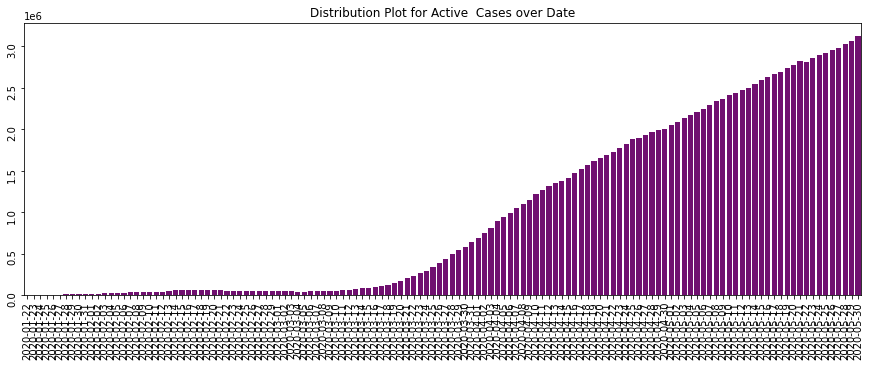

In [280]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date, y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"],color='purple')
plt.title("Distribution Plot for Active  Cases over Date")
plt.xticks(rotation=90) 
plt.yticks(rotation=90)

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000.]), <a list of 8 Text major ticklabel objects>)

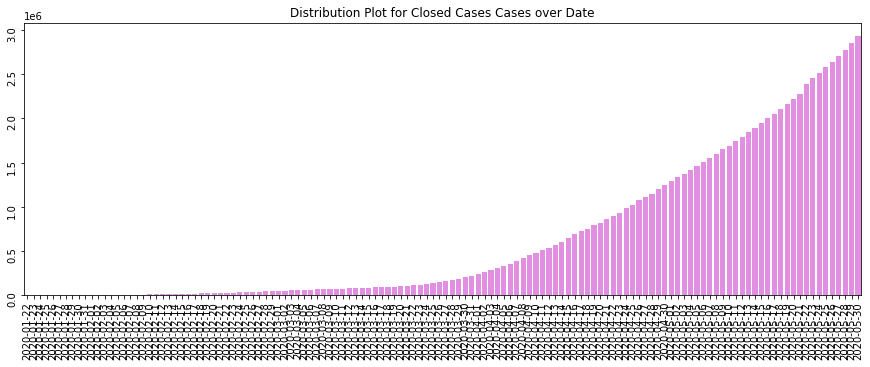

In [281]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date, y=datewise["Recovered"]+datewise["Deaths"], color="violet")
plt.title("Distribution Plot for Closed Cases Cases over Date")
plt.xticks(rotation=90)
plt.yticks(rotation=90)

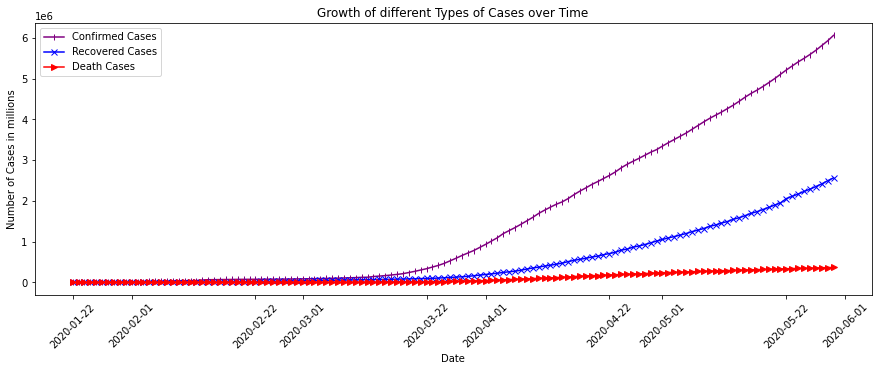

In [282]:
plt.figure(figsize=(15,5))
plt.plot(datewise["Confirmed"],label="Confirmed Cases",color='purple',marker='|')
plt.plot(datewise["Recovered"],label="Recovered Cases",color='blue', marker='x')
plt.plot(datewise["Deaths"],label="Death Cases",color='red', marker='>')
plt.ylabel("Number of Cases in millions")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.title("Growth of different Types of Cases over Time")
plt.legend()

In [0]:
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100

In [284]:
print("Average Mortality Rate",datewise["Mortality Rate"].mean())
print("Median Mortality Rate",datewise["Mortality Rate"].median())

Average Mortality Rate 4.749346091565495
Median Mortality Rate 4.5570220245349224


In [0]:
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100

In [286]:
print("Average Recovery Rate",datewise["Recovery Rate"].mean())
print("Median Recovery Rate",datewise["Recovery Rate"].median())

Average Recovery Rate 27.922566045079705
Median Recovery Rate 28.536725854943064


In [287]:
print("Average increase in number of Confirmed Cases every day: ",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered Cases every day: ",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths Cases every day: ",np.round(datewise["Deaths"].diff().fillna(0).mean()))

Average increase in number of Confirmed Cases every day:  46604.0
Average increase in number of Recovered Cases every day:  19728.0
Average increase in number of Deaths Cases every day:  2839.0


In [0]:
daily_increase_confirm=[]
daily_increase_recovered=[]
daily_increase_deaths=[]
for i in range(datewise.shape[0]-1):
    daily_increase_confirm.append(((datewise["Confirmed"].iloc[i+1]/datewise["Confirmed"].iloc[i])))
    daily_increase_recovered.append(((datewise["Recovered"].iloc[i+1]/datewise["Recovered"].iloc[i])))
    daily_increase_deaths.append(((datewise["Deaths"].iloc[i+1]/datewise["Deaths"].iloc[i])))
daily_increase_confirm.insert(0,1)
daily_increase_recovered.insert(0,1)
daily_increase_deaths.insert(0,1)



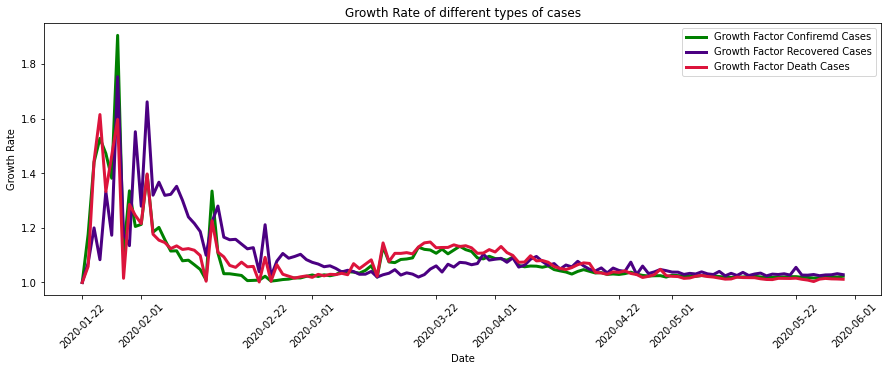

In [289]:
plt.figure(figsize=(15,5))
plt.plot(datewise.index,daily_increase_confirm,label="Growth Factor Confiremd Cases",linewidth=3,color='green')
plt.plot(datewise.index,daily_increase_recovered,label="Growth Factor Recovered Cases",linewidth=3,color='indigo')
plt.plot(datewise.index,daily_increase_deaths,label="Growth Factor Death Cases",linewidth=3,color='crimson')
plt.xlabel("Date")
plt.ylabel("Growth Rate")
plt.title("Growth Rate of different types of cases")
plt.xticks(rotation=45)
plt.legend()